In [104]:
#!pip install torch torchvision
import torch
from torch import nn
from torch import optim                             # used to compute the derivative
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import numpy as np
from matplotlib import pyplot as plt

from IPython.display import Markdown

# Tensors

- Used to encode $x$, $y$, and weights ($w's$) 
- Can run on GPUs

### Initialization

In [105]:
# you can initialize directly from an array
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [106]:
# you can use a numpy array as well
array = np.array(data)
x_np = torch.from_numpy(array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [107]:
# you can also initialize using other tensors
# by doing so, the new tensor has the same shape and datatype as the original tensor unless specified otherwise
x_ones = torch.ones_like(x_data)
print(x_ones, '\n')

x_rand = torch.rand_like(x_data, dtype = torch.float)
print(x_rand)

tensor([[1, 1],
        [1, 1]]) 

tensor([[0.1899, 0.7658],
        [0.1761, 0.6329]])


In [108]:
# it's possible to use a random or constant value
shape = (2,3,)
rand_tensor = torch.rand(shape)
rand_tensor[0][0] = 0
rand_tensor

tensor([[0.0000, 0.5961, 0.3147],
        [0.8738, 0.1925, 0.5019]])

In [109]:
# requires_grad should be set to False if you want the autgrad to begin recording operations on a tensor
# default is True
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2 + 3 * x + 1

# Tensor.grad is None by default
# when backward() is called, the gradients for self are computed 
# more calls to backward() will add gradients into it
y.backward()
print(x.grad)   # gradient of y w.r.t x at x = 2

# y'(2) = 2(x) + 3 = 2(2) + 3 = 7 --> gradient
# if you do backward again for this case, it will give an error

tensor([7.])


### Attributes and Operations

In [110]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [111]:
# to move your tensor to the GPU:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [112]:
# indexing is similar to that of numpy
tensor = torch.rand(4, 4)
print('Original tensor: ', tensor,'\n')
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print('Edited tensor: ',tensor)

Original tensor:  tensor([[0.2360, 0.7175, 0.4758, 0.7177],
        [0.2257, 0.8718, 0.0835, 0.4649],
        [0.5960, 0.1101, 0.8659, 0.7233],
        [0.9533, 0.4816, 0.2602, 0.5987]]) 

First row:  tensor([0.2360, 0.7175, 0.4758, 0.7177])
First column:  tensor([0.2360, 0.2257, 0.5960, 0.9533])
Last column: tensor([0.7177, 0.4649, 0.7233, 0.5987])
Edited tensor:  tensor([[0.2360, 0.0000, 0.4758, 0.7177],
        [0.2257, 0.0000, 0.0835, 0.4649],
        [0.5960, 0.0000, 0.8659, 0.7233],
        [0.9533, 0.0000, 0.2602, 0.5987]])


In [113]:
# you can concatenate tensors
# dim = 1 (hstack aka next to each other) and dim = 0 (vstack aka below the first one)
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t2 = torch.vstack([tensor, tensor, tensor])

print('cat: ', t1, '\n')
print('vstack: ', t2, '\n')

cat:  tensor([[0.2360, 0.0000, 0.4758, 0.7177, 0.2360, 0.0000, 0.4758, 0.7177, 0.2360,
         0.0000, 0.4758, 0.7177],
        [0.2257, 0.0000, 0.0835, 0.4649, 0.2257, 0.0000, 0.0835, 0.4649, 0.2257,
         0.0000, 0.0835, 0.4649],
        [0.5960, 0.0000, 0.8659, 0.7233, 0.5960, 0.0000, 0.8659, 0.7233, 0.5960,
         0.0000, 0.8659, 0.7233],
        [0.9533, 0.0000, 0.2602, 0.5987, 0.9533, 0.0000, 0.2602, 0.5987, 0.9533,
         0.0000, 0.2602, 0.5987]]) 

vstack:  tensor([[0.2360, 0.0000, 0.4758, 0.7177],
        [0.2257, 0.0000, 0.0835, 0.4649],
        [0.5960, 0.0000, 0.8659, 0.7233],
        [0.9533, 0.0000, 0.2602, 0.5987],
        [0.2360, 0.0000, 0.4758, 0.7177],
        [0.2257, 0.0000, 0.0835, 0.4649],
        [0.5960, 0.0000, 0.8659, 0.7233],
        [0.9533, 0.0000, 0.2602, 0.5987],
        [0.2360, 0.0000, 0.4758, 0.7177],
        [0.2257, 0.0000, 0.0835, 0.4649],
        [0.5960, 0.0000, 0.8659, 0.7233],
        [0.9533, 0.0000, 0.2602, 0.5987]]) 



In [114]:
# you can do matrix multiplication as:
# method 1
y1 = tensor @ tensor.T
# method 2
y2 = tensor.matmul(tensor.T)
# method 3
y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[0.7971, 0.4267, 1.0717, 0.7785],
        [0.4267, 0.2741, 0.5431, 0.5153],
        [1.0717, 0.5431, 1.6281, 1.2265],
        [0.7785, 0.5153, 1.2265, 1.3349]])

In [115]:
agg = tensor.sum()  # tensor of 1 number/element
agg_item = agg.item()   # item() converts it to a python numerical value
agg_item

6.200990200042725

In [116]:
# to do in place operations (ex: +=, -=), use '_' suffix
print('Original tensor: ', tensor, '\n')
tensor.add_(5)
print('New tensor: ', tensor, '\n')


Original tensor:  tensor([[0.2360, 0.0000, 0.4758, 0.7177],
        [0.2257, 0.0000, 0.0835, 0.4649],
        [0.5960, 0.0000, 0.8659, 0.7233],
        [0.9533, 0.0000, 0.2602, 0.5987]]) 

New tensor:  tensor([[5.2360, 5.0000, 5.4758, 5.7177],
        [5.2257, 5.0000, 5.0835, 5.4649],
        [5.5960, 5.0000, 5.8659, 5.7233],
        [5.9533, 5.0000, 5.2602, 5.5987]]) 



# Perceptron

### Example 1: Simple Perceptron

Example requirements:
- Have 4 inputs and a single output
- Initialize the weights to 1
- Consider a bias term
- Take training points as $x_1 = 5$, $x_2 = -2$, $y=2$
- Use backpropagation 
- Set 𝛼 = 0.1
- Use squared loss function

In [117]:
x = torch.tensor([[5., -2.]])
y = torch.tensor([[2.]])
w = torch.ones((1,2))

h = nn.Linear(2, 1, bias = True)
h.weight = nn.Parameter(w)
h.bias = nn.Parameter(torch.tensor([[1.]]))

optimizer = optim.SGD(h.parameters(), lr = .1)

cost = nn.MSELoss()

optimizer.zero_grad()
out = h(x)
print(f'Forward Pass, h = {h}')
loss = cost(out, y)
loss.backward()
print(f'Backward pass, Derivatives= {h.bias.grad} {h.weight.grad}')
optimizer.step()
print(f'Weights update, w= {h.bias.detach().numpy()} {h.weight.detach().numpy()}')


Forward Pass, h = Linear(in_features=2, out_features=1, bias=True)
Backward pass, Derivatives= tensor([[4.]]) tensor([[20., -8.]])
Weights update, w= [[0.6]] [[-1.   1.8]]


### Example 2: Linear

In [118]:
np.random.seed(22)
x_data = np.sort(-4. + 3. * np.random.rand(30))
y_data = 7. * x_data + np.random.randn(30)

x = torch.tensor(x_data[:,np.newaxis], dtype=torch.float32)
y = torch.tensor(y_data[:,np.newaxis], dtype=torch.float32)

h = nn.Linear(1, 1, bias=True)

optimizer = optim.SGD(h.parameters(), lr = 0.1)
cost = nn.MSELoss()

for i in range(50):
    optimizer.zero_grad()
    out = h(x)
    loss = cost(out, y)
    loss.backward()
    optimizer.step()
    
    print(f'\nEpoch [{i + 1} / {50}]')
    print('=================================')
    print(f'Forward Pass: h = {h} | Backward Pass: Derivatives = {h.bias.grad} {h.weight.grad} | Weights Update: w = {h.bias.detach().numpy()} {h.weight.detach().numpy()}')


Epoch [1 / 50]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([35.2282]) tensor([[-95.2964]]) | Weights Update: w = [-2.5317996] [[9.7279625]]

Epoch [2 / 50]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([-18.0817]) tensor([[48.2016]]) | Weights Update: w = [-0.72363055] [[4.9078045]]

Epoch [3 / 50]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([8.9354]) tensor([[-24.5084]]) | Weights Update: w = [-1.617171] [[7.3586445]]

Epoch [4 / 50]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([-4.7499]) tensor([[12.3360]]) | Weights Update: w = [-1.1421772] [[6.1250415]]

Epoch [5 / 50]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([2.1889]) tensor([[-6.3317]]) | Weights Update: w = [-1.3610679] [[6.7582

In [119]:
print('h Weight: ', h.weight)
print('h Bias: ', h.bias)

h Weight:  Parameter containing:
tensor([[6.7044]], requires_grad=True)
h Bias:  Parameter containing:
tensor([-0.8591], requires_grad=True)


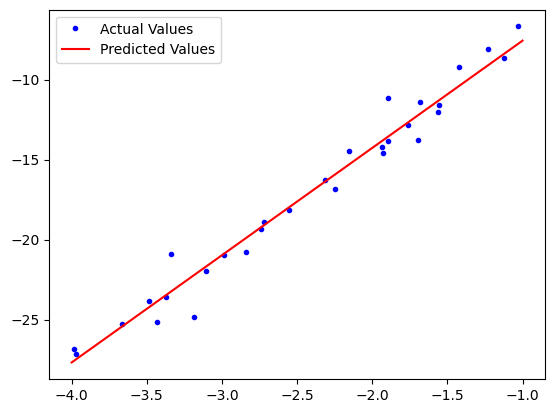

In [120]:
x_new = torch.linspace(-4, -1, 100).view(-1, 1)
y_new = h(x_new)

plt.plot(x_data, y_data, 'b.', label = 'Actual Values')
plt.plot(x_new, y_new.detach().numpy(),'r', label = 'Predicted Values')
plt.legend()

### Example 3: Nonlinear

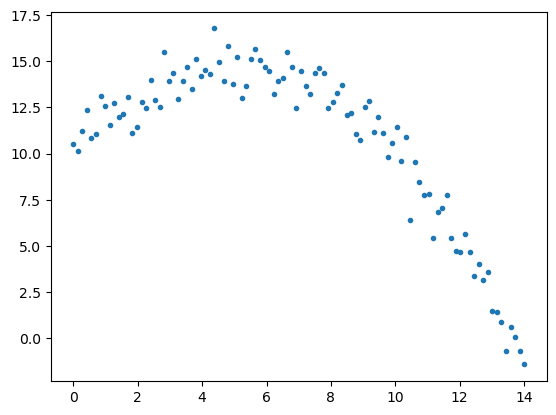

In [121]:
# Generate synthetic data for number of hours spend on video games vs happiness level
np.random.seed(42)
hours = torch.linspace(0, 14, 100).view(-1, 1) # 100 numbers between 0 and 14
happiness = 10 + 2 * hours + 0.2*np.random.normal(0, 5, 100).astype(np.float32).reshape(-1,1) - 0.2 * hours**2
x = hours
y = happiness

plt.plot(x, y, '.')

In [122]:
# TODO
# 2 hidden layers; each will have 6 neurons (for each neuron, we have a bias term), use ReLU for the function g in the hidden layers

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(1, 6, bias=True)
        # self.fc1 = nn.ReLU()
        self.layer2 = nn.Linear(6, 6)
        # self.fc2 = nn.ReLU()
        self.layer3 = nn.Linear(6, 1)

    def forward(self, x):
        # x= self.layer1(x)
        # x= self.fc1(x)
        # x= self.layer2(x)
        # x= self.fc2(x)
        # x= self.layer3(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x
    
model = Model()

num_epochs = 10000
optimizer = optim.SGD(model.parameters(), lr = 0.001)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1} / {num_epochs}] -- Loss: {loss.item():.4f}')


Epoch [500 / 10000] -- Loss: 11.8613
Epoch [1000 / 10000] -- Loss: 6.8586
Epoch [1500 / 10000] -- Loss: 5.4352
Epoch [2000 / 10000] -- Loss: 4.4606
Epoch [2500 / 10000] -- Loss: 3.3546
Epoch [3000 / 10000] -- Loss: 2.2216
Epoch [3500 / 10000] -- Loss: 2.1627
Epoch [4000 / 10000] -- Loss: 2.5750
Epoch [4500 / 10000] -- Loss: 2.2129
Epoch [5000 / 10000] -- Loss: 2.3810
Epoch [5500 / 10000] -- Loss: 2.0120
Epoch [6000 / 10000] -- Loss: 1.5961
Epoch [6500 / 10000] -- Loss: 1.6886
Epoch [7000 / 10000] -- Loss: 1.6074
Epoch [7500 / 10000] -- Loss: 1.7119
Epoch [8000 / 10000] -- Loss: 1.6335
Epoch [8500 / 10000] -- Loss: 1.5631
Epoch [9000 / 10000] -- Loss: 1.5222
Epoch [9500 / 10000] -- Loss: 1.5103
Epoch [10000 / 10000] -- Loss: 1.4287


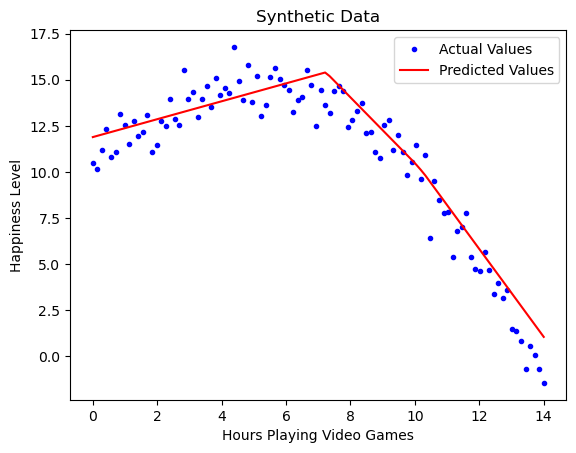

In [123]:
plt.plot(x, y, 'b.', label = 'Actual Values')

out = model.forward(x)
plt.plot(x, out.detach().numpy(), 'r', label = 'Predicted Values')
plt.xlabel('Hours Playing Video Games')
plt.ylabel('Happiness Level')
plt.title('Synthetic Data')
plt.legend()

### Example 4: MNIST

In [124]:
training_data = datasets.MNIST(
    root='~/Downloads/VisionCNN',
    train=True,
    download=True,
    transform=transforms.Compose([
              transforms.ToTensor()])
)                                     # download MNIST dataset, save it in the Downloads folder, we only want to get the training part
                                      # download = True --> download if it doesn't exist
                                      # transforms.ToTensor() --> convert each image in the PIL data type to Tensor
                                      # if you want to apply Gaussian Blur, flip the image, do some data augmentation --> all can be specified here 

# training_data[0] --> first image in the training dataset, prints as a tuple -- PIL image & its ground truth label which is 8 (for e.g.)
# training_data[0][0] --> display the actual image
# Above is assumed without the transforms.ToTensor() part

test_data = datasets.MNIST(
    root='~/Downloads/VisionCNN',
    train=False,
    download=True,
    transform=ToTensor()
)
batchsize = 64
train_dataloader = DataLoader(training_data, batch_size=batchsize, shuffle=True)        # accepts a dataset, specify the batch size, do you want to shuffle, etc.
test_dataloader = DataLoader(test_data, batch_size=8, shuffle=True)

In [184]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()

        self.layer1 = nn.Linear(28*28, 10, bias=True)
        self.prob = nn.LogSoftmax(dim = 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.prob(x)
        return x
    
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

J_history = []
num_epochs=40
for epoch in range(num_epochs):
    tot_loss = 0

    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.reshape(inputs.shape[0], -1)
        optimizer.zero_grad()
        pred = model(inputs)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()
        tot_loss += loss.item()

        if i % 300 == 0:
            print(f'Epoch [{epoch + 1} / {num_epochs}] -- {i + 1} | Loss: {loss.item():.4f}')
    
    J_history += [tot_loss]

Epoch [1 / 40] -- 1 | Loss: 2.3384
Epoch [1 / 40] -- 301 | Loss: 2.0169
Epoch [1 / 40] -- 601 | Loss: 1.8417
Epoch [1 / 40] -- 901 | Loss: 1.5513
Epoch [2 / 40] -- 1 | Loss: 1.5503
Epoch [2 / 40] -- 301 | Loss: 1.4859
Epoch [2 / 40] -- 601 | Loss: 1.4592
Epoch [2 / 40] -- 901 | Loss: 1.1393
Epoch [3 / 40] -- 1 | Loss: 1.1785
Epoch [3 / 40] -- 301 | Loss: 1.2355
Epoch [3 / 40] -- 601 | Loss: 1.0358
Epoch [3 / 40] -- 901 | Loss: 1.0566
Epoch [4 / 40] -- 1 | Loss: 1.1626
Epoch [4 / 40] -- 301 | Loss: 0.9192
Epoch [4 / 40] -- 601 | Loss: 0.9405
Epoch [4 / 40] -- 901 | Loss: 0.9391
Epoch [5 / 40] -- 1 | Loss: 0.8274
Epoch [5 / 40] -- 301 | Loss: 0.7073
Epoch [5 / 40] -- 601 | Loss: 0.8024
Epoch [5 / 40] -- 901 | Loss: 0.8566
Epoch [6 / 40] -- 1 | Loss: 0.7633
Epoch [6 / 40] -- 301 | Loss: 0.8173
Epoch [6 / 40] -- 601 | Loss: 0.7387
Epoch [6 / 40] -- 901 | Loss: 0.7423
Epoch [7 / 40] -- 1 | Loss: 0.7207
Epoch [7 / 40] -- 301 | Loss: 0.7502
Epoch [7 / 40] -- 601 | Loss: 0.6679
Epoch [7 / 40] 

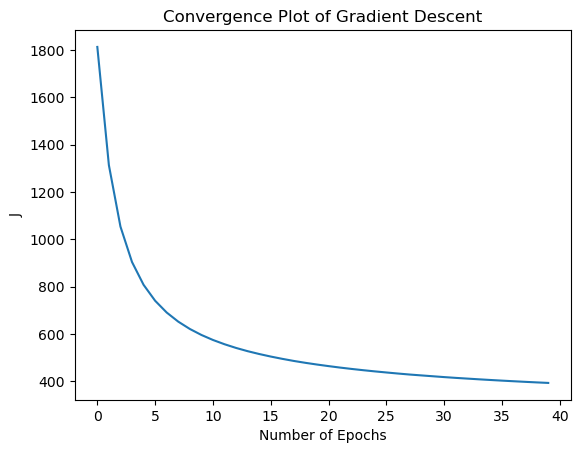

In [185]:
plt.plot(J_history)
plt.title('Convergence Plot of Gradient Descent')
plt.xlabel('Number of Epochs')
plt.ylabel('J')
plt.show()

In [186]:
x_test = []
y_test = []
for i in range(20):
    x_test.append(np.array(test_data[i][0]))
    y_test.append(test_data[i][1])

x_test_new = np.array(x_test).reshape(-1, 28*28)
y_test = np.array(y_test)
x_tensor = torch.Tensor(x_test_new)
y_pred = model(x_tensor).argmax(axis=1)


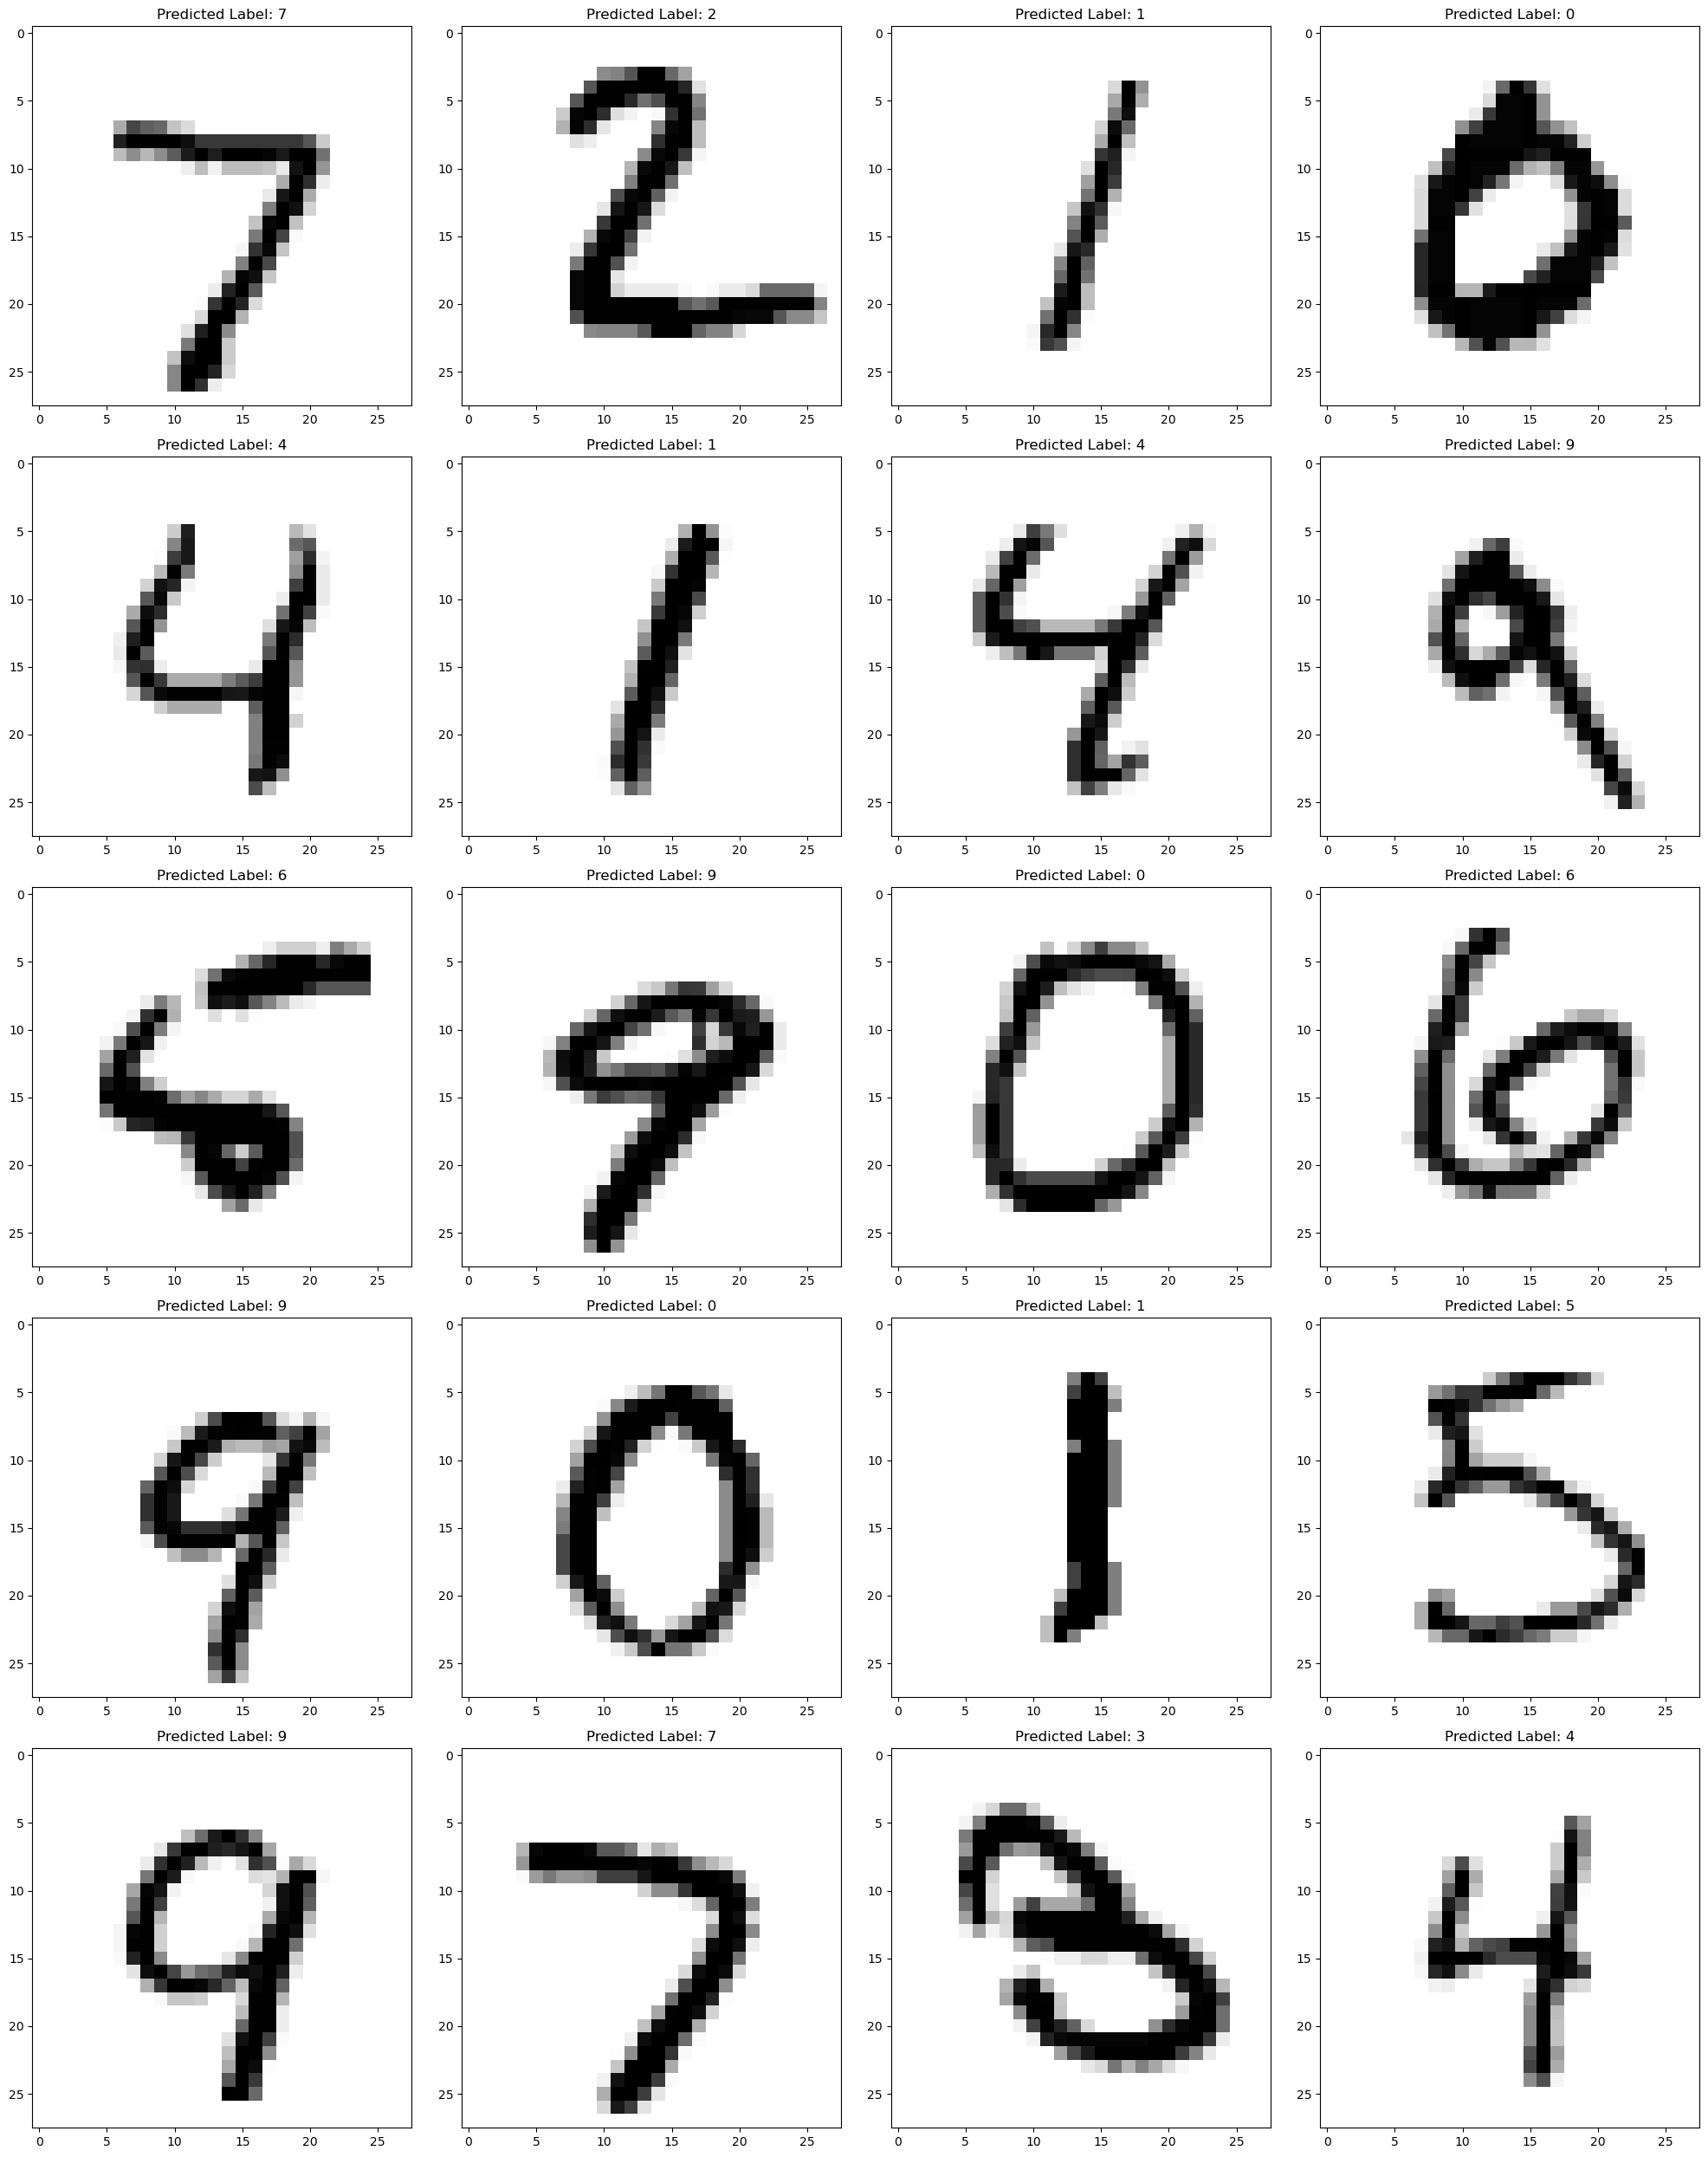

In [188]:
fig, axes = plt.subplots(5, 4, figsize=(20, 25))

for i in range(20):
    plt.subplot(5, 4, i + 1)
    
    plt.imshow(x_test[i].squeeze(), cmap='gray_r')
    
    plt.title(f"Predicted Label: {y_pred[i]}")

fig.tight_layout()

plt.show()

# Convolutional Neural Network

In [189]:
torch.manual_seed(0)

transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
trainset = datasets.CIFAR10(
    root='~/Downloads/VisionCNN',
    train=True,
    download=True,
    transform=transform
)

testset = datasets.CIFAR10(
    root='~/Downloads/VisionCNN',
    train=False,
    download=True,
    transform=transform
)

batchsize = 64
trainloader = DataLoader(trainset, batch_size=batchsize, shuffle=True)
testloader = DataLoader(testset, batch_size=batchsize, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified
